## Introduction

Diabetes merupakan penyakit metabolik kronis yang ditandai dengan tingginya kadar glukosa dalam darah akibat gangguan produksi atau fungsi insulin. Penyakit ini menjadi masalah kesehatan global karena dampaknya yang luas, mulai dari komplikasi kardiovaskular, gangguan penglihatan, hingga kerusakan saraf dan ginjal. Seiring dengan peningkatan jumlah penderita diabetes di seluruh dunia, diperlukan pendekatan inovatif untuk mendeteksi, memantau, dan mengelola penyakit ini secara efektif.

**Problem Statement**

Masalah yang ingin saya selesaikan adalah melakukan diagnosa pasien penderita penyakit diabetes secara tepat dan akurat. Perlu dilakukan analisis faktor-faktor penyebab dan gejala penyakit diabetes

**About Datasets**

Dataset yang digunakan adalah data Diabetes Prediction yang diunduh dari Kaggle : https://www.kaggle.com/code/shahidak/diabetes-prediction

Dataset heart disease terdiri dari 768 baris data dan 8 atribut + 1 target. Dataset ini memiliki 9 kolom yaitu:

1. Pregnancies : Menunjukkan jumlah kehamilan yang pernah dialami oleh pasien. Semakin banyak kehamilan, beberapa studi menunjukkan ada hubungan dengan peningkatan risiko diabetes.
2. Glucose : Mengacu pada kadar glukosa dalam darah. Tes ini biasanya dilakukan saat tes toleransi glukosa, di mana kadar glukosa diukur setelah pasien mengonsumsi larutan gula.
3. BloodPressure : Mengukur tekanan darah diastolik pasien (dalam mm Hg). Tekanan darah yang tinggi sering kali dikaitkan dengan risiko komplikasi kesehatan, termasuk diabetes.
4. SkinThickness : Merupakan pengukuran ketebalan lipatan kulit, biasanya di area trisep. Angka ini sering dijadikan indikator lemak tubuh, yang berperan dalam penilaian risiko diabetes.
5. Insulin : Mengacu pada kadar insulin serum, biasanya diukur 2 jam setelah melakukan tes oral glukosa. Kadar insulin yang tidak normal bisa menjadi indikator resistensi insulin.
6. BMI (Body Mass Index) : Adalah rasio berat badan terhadap tinggi badan (kg/m²). BMI digunakan untuk mengklasifikasikan status berat badan dan dapat menjadi indikator risiko diabetes.
7. DiabetesPedigreeFunction : Merupakan fungsi yang menghitung kemungkinan risiko diabetes berdasarkan riwayat keluarga dan faktor genetik. Semakin tinggi nilainya, semakin tinggi pula risiko diabetes.
8. Age : Usia pasien dalam tahun. Faktor usia dapat mempengaruhi risiko seseorang untuk mengidap diabetes.
9. Outcome : Variabel target atau hasil diagnosis. Nilai 1 menunjukkan bahwa pasien mengidap diabetes, sedangkan nilai 0 berarti tidak mengidap.



**Objective**

Prediksi diabetes bertujuan untuk mengidentifikasi apakah seseorang berisiko mengidap diabetes berdasarkan data medis dan faktor gaya hidup. Dengan menggunakan algoritma machine learning atau metode statistik, model prediksi ini dapat membantu dalam deteksi dini dan pengambilan keputusan medis.

**Persiapan**

Disini saya akan menyiapkan libraries yang diperlukan. Dalam rangka mengetahui tentang dataset, saya akan melihat overview.

In [134]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [135]:
# Memuat dataset
diabetes_data = pd.read_csv("diabetes.csv") 
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [136]:
## Melihat columns apa saja yang ada dalam dataset
diabetes_data.describe()  
diabetes_data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [137]:
#memisahkan kolom target 
X = diabetes_data.drop (columns='Outcome', axis =1)
Y = diabetes_data['Outcome']

In [138]:
print (X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [139]:
print (Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [140]:
diabetes_data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [141]:
missing = diabetes_data.isnull().sum()  
missing  

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [142]:
duplicates = diabetes_data.duplicated().sum() 
duplicates 

np.int64(0)

In [143]:
scaler = StandardScaler()

In [144]:
scaler.fit(X)

StandardScaler()

In [145]:
standarized_data = scaler.transform(X)
print(standarized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [146]:
X = standarized_data
Y = diabetes_data['Outcome']

In [147]:
print (X)
print (Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [148]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size= 0.2, stratify=Y, random_state=2)
print (X.shape, X_test.shape, X_train.shape)

(768, 8) (154, 8) (614, 8)


Menghapus outlier

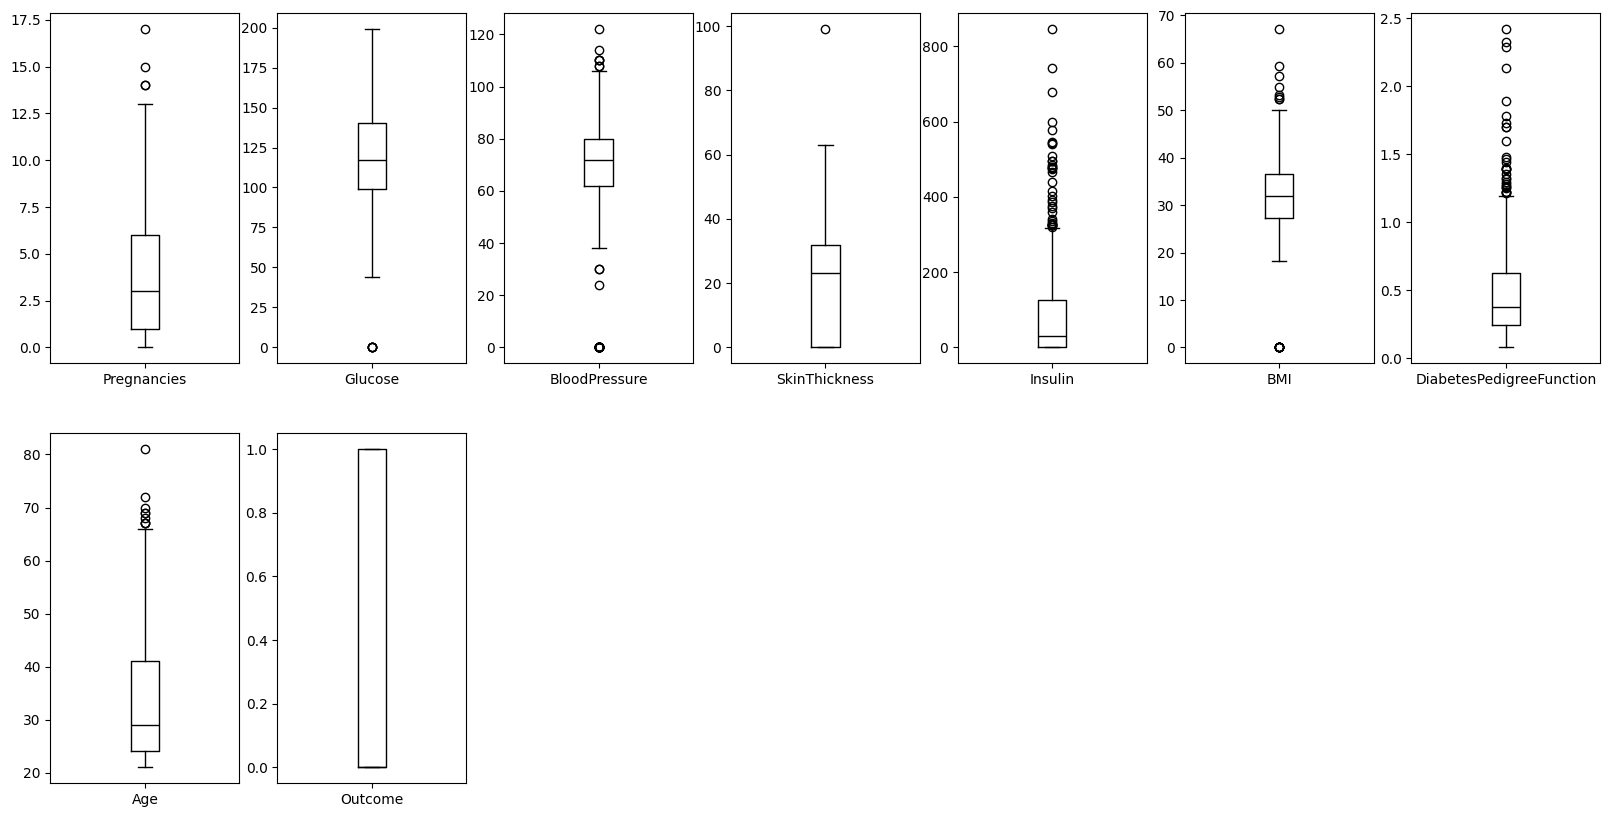

In [149]:
diabetes_data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [150]:
continous_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

def outliers(data_out, drop=False):
    for each_feature in data_out.columns:
        feature_data = pd.to_numeric(data_out[each_feature], errors='coerce').dropna()
        
        if feature_data.empty:
            print(f"Fitur {each_feature} kosong setelah pembersihan, lewati perhitungan.")
            continue

        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & 
                                  (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
            print(f'For the feature {each_feature}, Num of Outliers is {len(outliers)}')
        else:
            data_out.drop(outliers, inplace=True, errors='ignore')
            print(f'Outliers from {each_feature} feature removed')

In [151]:
def remove_outliers(df, features):
    df_clean = df.copy()
    for feature in features:
        feature_data = pd.to_numeric(df_clean[feature], errors='coerce').dropna()

        if feature_data.empty:
            print(f"Fitur {feature} kosong setelah pembersihan, lewati perhitungan.")
            continue

        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)
        IQR = Q3 - Q1
        outlier_step = IQR * 1.5
        outliers_idx = df_clean.index[~((df_clean[feature] >= Q1 - outlier_step) &
                                        (df_clean[feature] <= Q3 + outlier_step))]
        df_clean.drop(outliers_idx, inplace=True, errors='ignore')
        print(f'Outliers from {feature} feature removed')
    return df_clean

# Terapkan fungsi dan simpan DataFrame yang sudah dibersihkan
diabetes_data_clean = remove_outliers(diabetes_data, continous_features)

Outliers from Pregnancies feature removed
Outliers from Glucose feature removed
Outliers from BloodPressure feature removed
Outliers from SkinThickness feature removed
Outliers from Insulin feature removed
Outliers from BMI feature removed
Outliers from DiabetesPedigreeFunction feature removed
Outliers from Age feature removed
Outliers from Outcome feature removed


In [152]:
print(diabetes_data.shape)
print(diabetes_data_clean.shape)

(768, 9)
(636, 9)


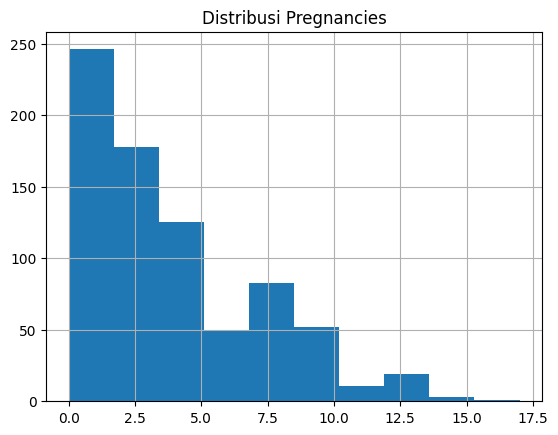

In [153]:
diabetes_data['Pregnancies'].hist().plot(kind='bar')
plt.title('Distribusi Pregnancies')
plt.show()

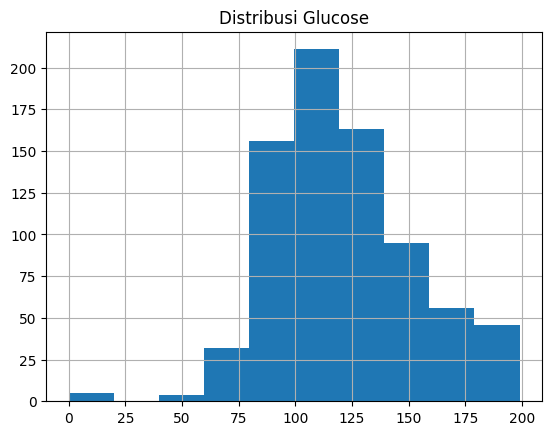

In [154]:
diabetes_data['Glucose'].hist().plot(kind='bar')
plt.title('Distribusi Glucose')
plt.show()

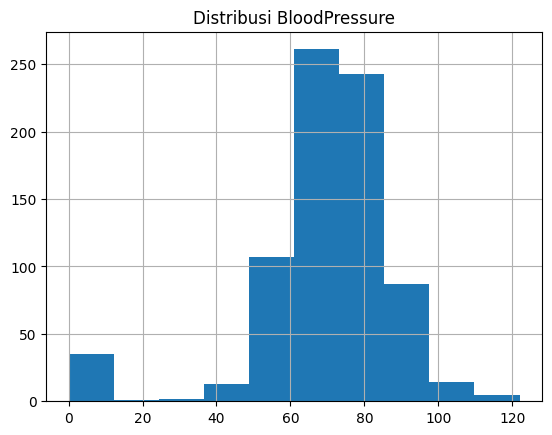

In [155]:
diabetes_data['BloodPressure'].hist().plot(kind='bar')
plt.title('Distribusi BloodPressure')
plt.show()

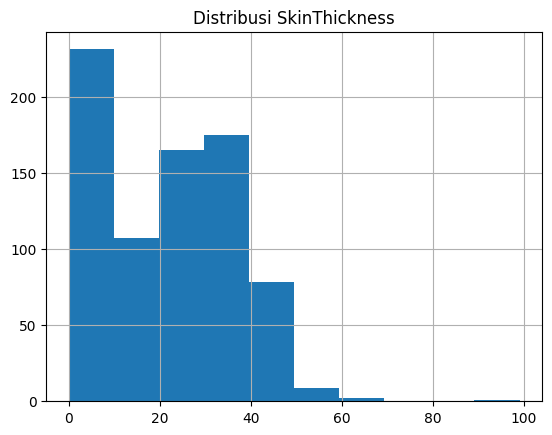

In [156]:
diabetes_data['SkinThickness'].hist().plot(kind='bar')
plt.title('Distribusi SkinThickness')
plt.show()

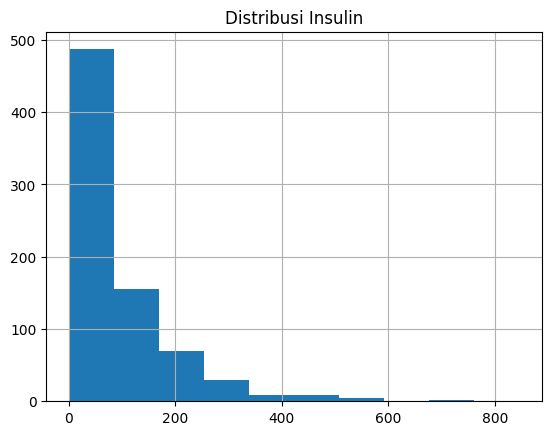

In [157]:
diabetes_data['Insulin'].hist().plot(kind='bar')
plt.title('Distribusi Insulin')
plt.show()

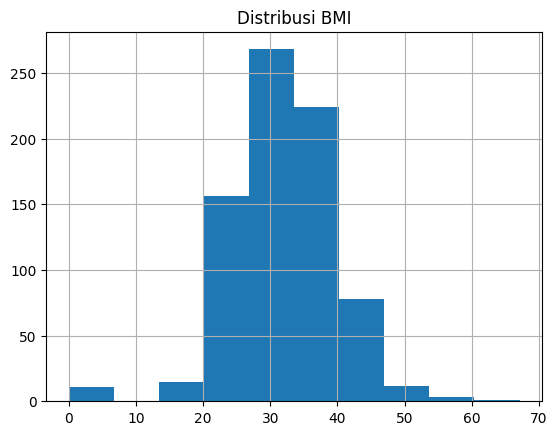

In [158]:
diabetes_data['BMI'].hist().plot(kind='bar')
plt.title('Distribusi BMI')
plt.show()

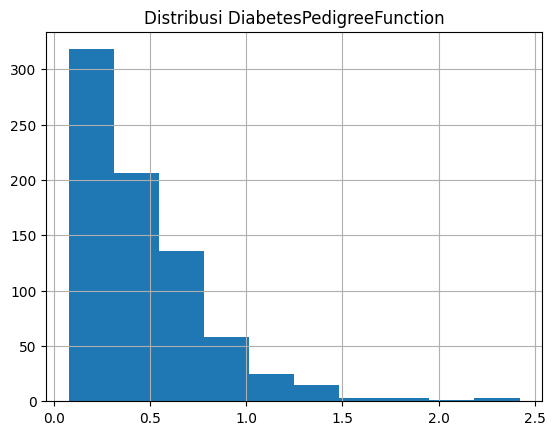

In [159]:
diabetes_data['DiabetesPedigreeFunction'].hist().plot(kind='bar')
plt.title('Distribusi DiabetesPedigreeFunction')
plt.show()

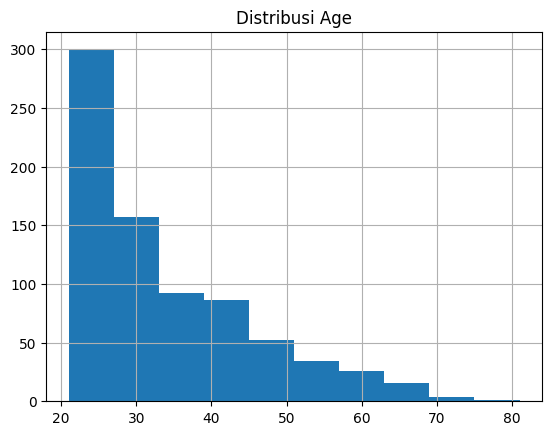

In [160]:
diabetes_data['Age'].hist().plot(kind='bar')
plt.title('Distribusi Age')
plt.show()

In [161]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


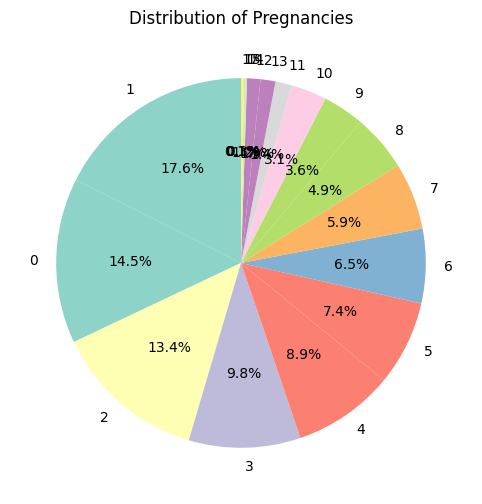

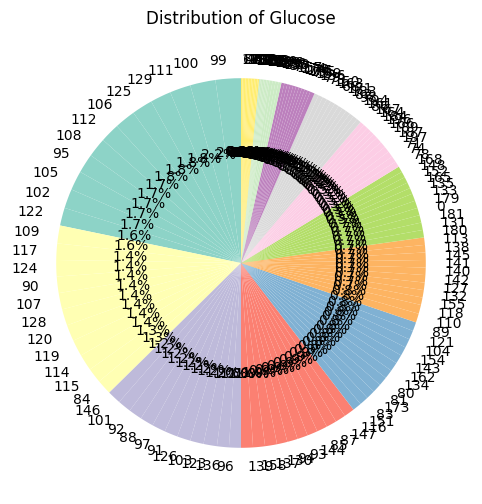

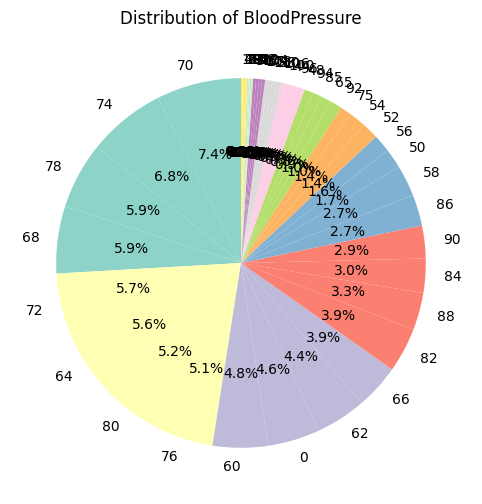

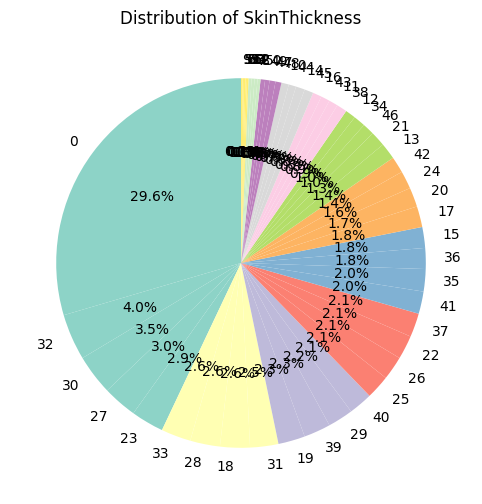

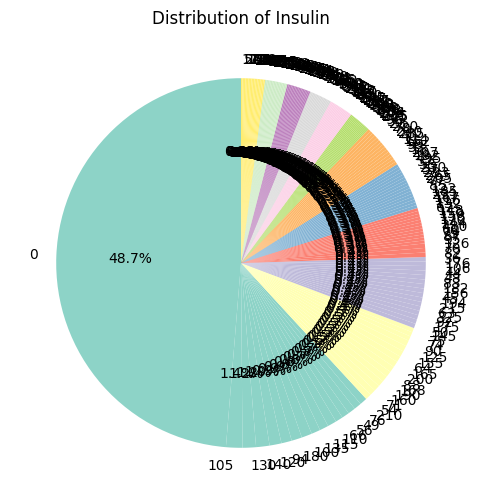

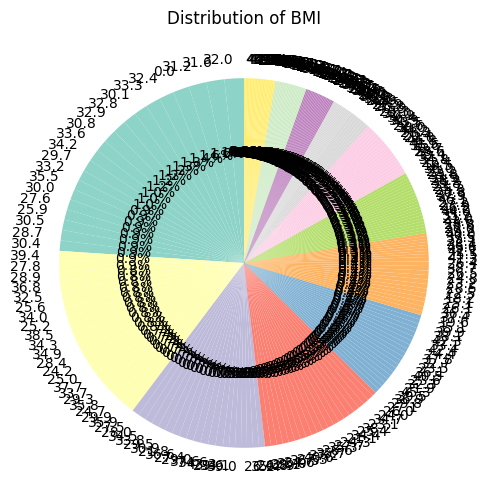

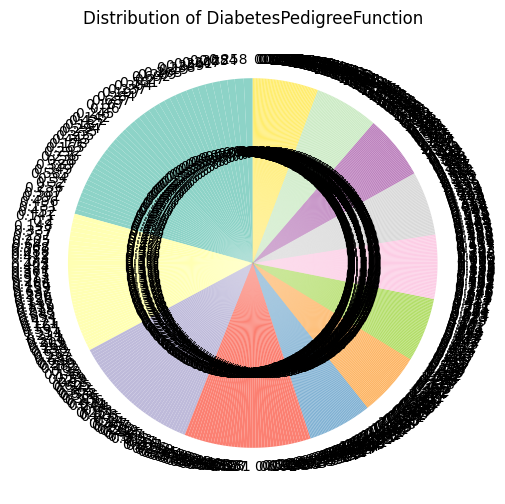

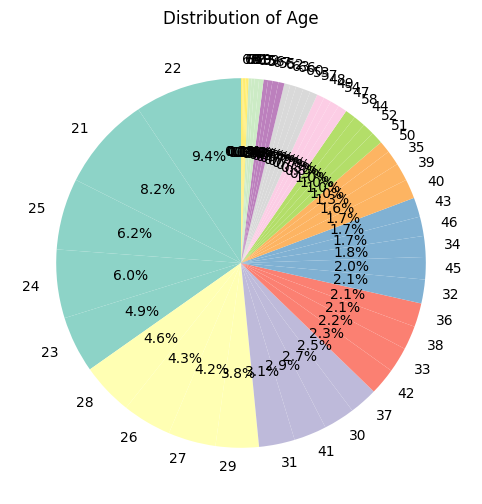

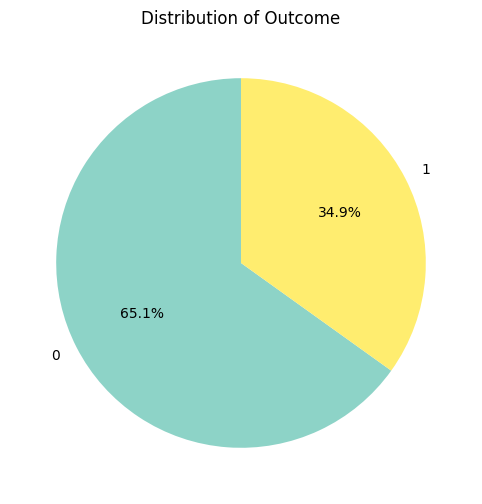

In [162]:
def plot_pie_chart(data, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        
        # Menghitung proporsi kategori
        data[feature].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
        
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')  # Tidak perlu label untuk grafik pie
        plt.show()

# Asumsi diabetes_data adalah DataFrame Anda
plot_pie_chart(diabetes_data, continous_features)

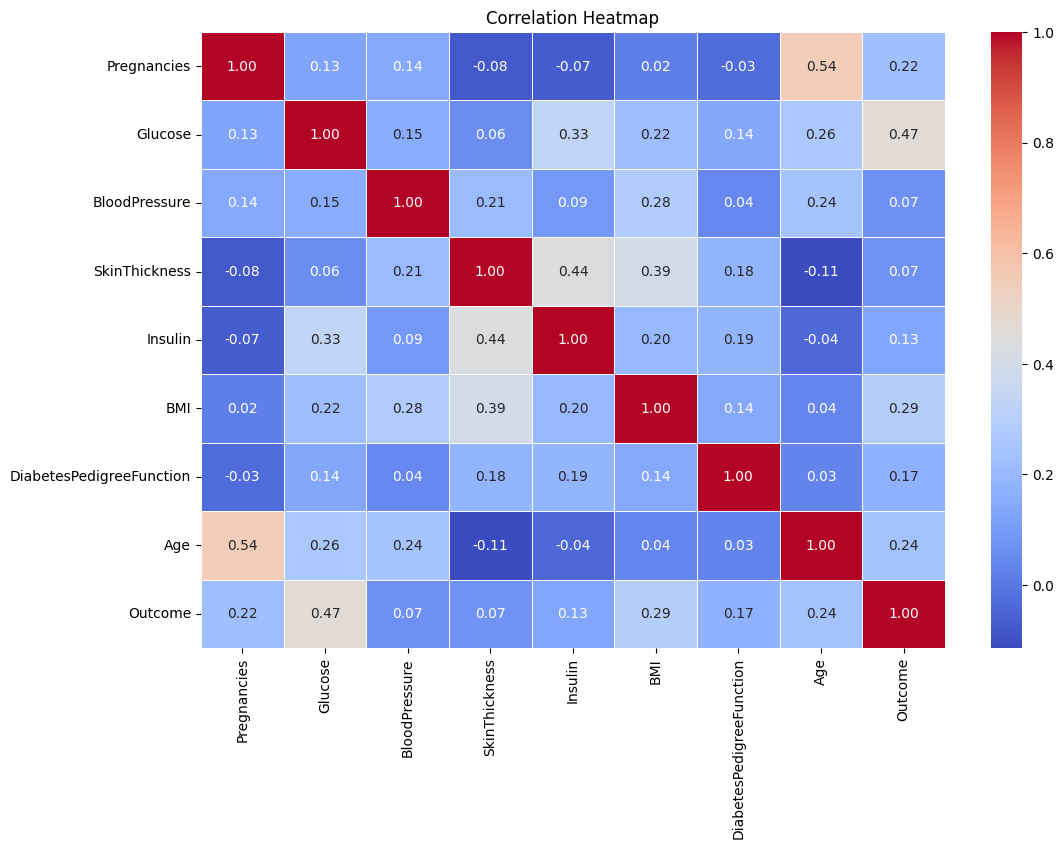

In [163]:
def plot_correlation_heatmap(data):
    
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    corr_matrix = numeric_data.corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    
    plt.title('Correlation Heatmap')
    plt.show()
    
plot_correlation_heatmap(diabetes_data)

In [164]:
def display_correlation_table(data):

    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    corr_matrix = numeric_data.corr()
    print("Correlation Matrix:")
    print(corr_matrix)

display_correlation_table(diabetes_data)

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

In [165]:
cor_matrix = diabetes_data.corr()
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [166]:
#Mengurutkan korelasi
cor_matrix['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

Korelasi target(prediksi diabetes) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit diabetes :

1. BloodPressure               0.065068 (Korelasi Positif Lemah)
2. SkinThickness               0.074752 (Korelasi Positif Lemah)
3. Insulin                     0.130548 (Korelasi Positif Lemah)
4. DiabetesPedigreeFunction    0.173844 (Korelasi Positif Kuat)
5. Pregnancies                 0.221898 (Korelasi Positif Kuat)
6. Age                         0.238356 (Korelasi Positif Kuat)
7. BMI                         0.292695 (Korelasi Positif Kuat)
8. Glucose                     0.466581 (Korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit Diabetes ialah, sebagai berikut:

1. Glucose (0.466581) → Paling Berpengaruh
Kadar glukosa dalam darah adalah faktor utama dalam diagnosis diabetes.
Semakin tinggi kadar glukosa, semakin tinggi risiko terkena diabetes.
Diabetes Mellitus tipe 2 biasanya terjadi karena resistensi insulin yang menyebabkan kadar glukosa tinggi dalam darah.

2. BMI (0.292695) → Berpengaruh Signifikan
BMI (Body Mass Index) mengukur tingkat obesitas seseorang.
Kelebihan berat badan atau obesitas sering dikaitkan dengan risiko diabetes tipe 2.
Lemak tubuh yang tinggi dapat menyebabkan resistensi insulin, meningkatkan kadar gula darah.

3. Age (0.238356) → Berpengaruh
Usia yang lebih tua meningkatkan risiko terkena diabetes.
Semakin bertambah usia, sensitivitas insulin dalam tubuh bisa menurun.
Faktor ini juga berhubungan dengan gaya hidup dan penurunan aktivitas fisik.

4. Pregnancies (0.221898) → Berpengaruh pada Wanita
Jumlah kehamilan berhubungan dengan risiko diabetes gestasional.
Wanita yang pernah mengalami diabetes gestasional lebih berisiko mengalami diabetes tipe 2 di kemudian hari.

5. Diabetes Pedigree Function (0.173844) → Berpengaruh (Faktor Genetik)
Mengukur kemungkinan risiko diabetes berdasarkan riwayat keluarga.
Jika seseorang memiliki keluarga dengan diabetes, risikonya lebih tinggi.

6. Insulin (0.130548) → Berpengaruh Lemah
Kadar insulin dalam darah berhubungan dengan resistensi insulin.
Namun, korelasinya tidak terlalu kuat karena faktor lain seperti pola makan dan aktivitas fisik juga mempengaruhi.

7. Skin Thickness (0.074752) → Berpengaruh Lemah
Lipatan kulit tebal dapat menjadi indikator tingkat lemak tubuh.
Namun, korelasinya terhadap diabetes tidak terlalu signifikan.

8. Blood Pressure (0.065068) → Berpengaruh Lemah
Hipertensi sering dikaitkan dengan diabetes, tetapi dalam dataset ini, korelasinya rendah.
Faktor tekanan darah lebih berhubungan dengan komplikasi diabetes daripada penyebab langsung.

In [169]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(diabetes_data.drop("Outcome", axis=1))

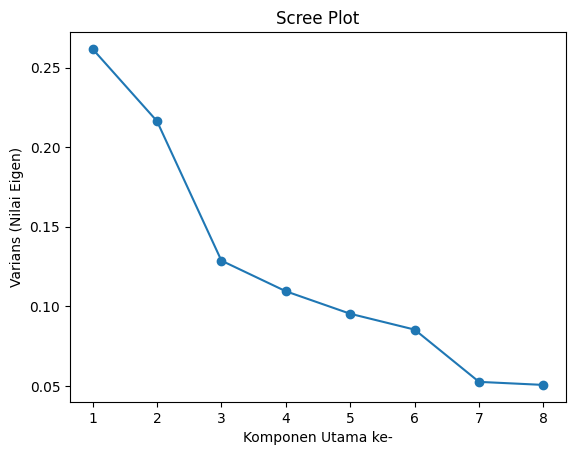

In [170]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(n_components=feature_number)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Scree Plot
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

**Pemodelan dengan Diabetes dataset**
logistic regression, decision tree, random forest dan neural networks.

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [194]:
# model Logistic Regression
dlf = LogisticRegression()
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of Logistic Regression Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of Logistic Regression Classifier is  0.7597402597402597


In [173]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



In [174]:
#Decision Tree 
dlf = DecisionTreeClassifier(random_state=100)
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7012987012987013


In [175]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79       100
           1       0.60      0.44      0.51        54

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154



In [176]:
# Random Forest
dlf = RandomForestClassifier(random_state=100)
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.7532467532467533


In [177]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [178]:
from sklearn.neural_network import MLPClassifier
# MLP
dlf = MLPClassifier(random_state=100, max_iter=1000)
dlf.fit(X_train, Y_train)
y_pred = dlf.predict(X_test)
print("The test accuracy score of MLP Classifier is ", accuracy_score(Y_test, y_pred))

The test accuracy score of MLP Classifier is  0.7272727272727273


In [179]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       100
           1       0.66      0.46      0.54        54

    accuracy                           0.73       154
   macro avg       0.70      0.67      0.67       154
weighted avg       0.72      0.73      0.71       154



**Membandingkan hasil diatas**

Berdasarkan hasil ke-4 model (Random Forest, Logistic Regression, Decision Tree dan Multi-layer Perceptron). Berikut didapatkan akurasi pada proses kali ini:
- Pada model Decision Tree memiliki nilai akurasi terkecil sebesar 70% dengan recall sebesar 64%.
- Logistic Regressiont memiliki nilai akurasi terbesar sebesar 76% dengan recall 70%.

**Proses Hyperparameter Tuning**

In [180]:
#Logistic regression classifier with hyperparameter
dlf = LogisticRegression(random_state=100)
param_grid = {
    'max_iter': [100, 200, 300],  
    'multi_class': ['auto', 'ovr', 'multinomial'],  
    'solver': ['liblinear', 'lbfgs', 'saga']  
}
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_lg = gs1.fit(X_train, Y_train) 
print(fit_dlf_lg.best_params_) 
print(fit_dlf_lg.best_score_)  

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
0.8382225913621262


In [181]:
y_pred = fit_dlf_lg.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       100
           1       0.72      0.52      0.60        54

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.75      0.76      0.75       154



Setelah dilakukan hyperparameter tuning model logistic regression Nilai akurasi sama yaitu 76%.

In [182]:
# Random Forest classifier with hyperparameter
dlf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200],  
               'max_depth': [None, 10, 20, 30],  
               'criterion': ['gini', 'entropy']}  
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_rf = gs1.fit(X_train, Y_train)  
print(fit_dlf_rf.best_params_)  
print(fit_dlf_rf.best_score_)  

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 200}
0.8435492801771872


In [183]:
y_pred = fit_dlf_rf.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



Setelah dilakukan hyperparameter tuning model Random Forest Nilai akurasi mengalami penurunan dari 75% menjadi 73%

In [184]:
# Decision Tree classifier with hyperparameter
dlf = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [1, 5, 10],  
               'max_depth': [None, 10, 20, 30],  
               'criterion': ['gini', 'entropy']}  
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_dt = gs1.fit(X_train, Y_train)  
print(fit_dlf_dt.best_params_)  
print(fit_dlf_dt.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 10}
0.7571656976744187


In [185]:
y_pred = fit_dlf_dt.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



Setelah dilakukan hyperparameter tuning model Decision Tree Nilai akurasi mengalami keniakan yaitu dari 70% menjadi 74%

In [186]:
# MLP Classifier with hyperparameter
dlf = MLPClassifier(max_iter=1000, random_state=100)
param_grid1 = {'hidden_layer_sizes': [(50,), (100,), (50, 50)],  
               'activation': ['relu', 'tanh'],  
               'solver': ['adam', 'sgd']}  
gs1 = GridSearchCV(
        estimator=dlf,
        param_grid=param_grid1, 
        cv=5, 
        n_jobs=-1, 
        scoring='roc_auc'
    )
fit_dlf_mlp = gs1.fit(X_train, Y_train)  
print(fit_dlf_mlp.best_params_)  
print(fit_dlf_mlp.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}
0.843499446290144


In [187]:
y_pred = fit_dlf_mlp.predict(X_test)  
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



Setelah dilakukan hyperparameter tuning model MLP Classifier Nilai akurasi mengalami kenaikan dari 73% ke 75%

**ROC Analysis**

Tujuan untuk melakukan ROC Analysis yang saya lakukan adalah sebagai berikut :

1. Mengukur kemampuan model dalam membedakan kelas positif & negatif.
2.  Memilih threshold terbaik untuk kebutuhan spesifik.
3.  Membandingkan model yang berbeda secara objektif.
4.  Mengatasi masalah dataset tidak seimbang.

In [188]:
y_pred_logreg = fit_dlf_lg.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Logistic Regression
y_pred_rf = fit_dlf_rf.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Random Forest
y_pred_dt = fit_dlf_dt.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk Decision Tree
y_pred_mlp = fit_dlf_mlp.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif untuk MLP

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(Y_test, y_pred_logreg)  # AUC-ROC untuk Logistic Regression
auc_rf = roc_auc_score(Y_test, y_pred_rf)  # AUC-ROC untuk Random Forest
auc_dt = roc_auc_score(Y_test, y_pred_dt)  # AUC-ROC untuk Decision Tree
auc_mlp = roc_auc_score(Y_test, y_pred_mlp)  # AUC-ROC untuk MLP

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.7937037037037038
AUC-ROC for Random Forest: 0.7935185185185185
AUC-ROC for Decision Tree: 0.7382407407407408
AUC-ROC for MLP: 0.8046296296296297


Jika dilihat dari nilai AUC-ROC, model MLP memiliki nilai yang paling tinggi. Akan tetapi perbedaan nilai AUC-ROC MLP dengan 1 model lainnya tidak terpaut jauh dengan logistic regression dan random forest

ROC adalah kurva probabilitas dan AUC mewakili tingkat atau ukuran pemisahan. Ini menunjukkan seberapa baik model mampu membedakan antara kelas. Semakin tinggi AUC, semakin baik modelnya dalam memprediksi kelas 0 sebagai 0 dan kelas 1 sebagai 1.

Kurva ROC digambarkan dengan TPR (True Positive Rate) melawan FPR (False Positive Rate) di mana TPR berada di sumbu y dan FPR berada di sumbu x.

Model yang sangat baik memiliki AUC mendekati 1, yang berarti memiliki ukuran pemisahan yang baik. Model yang buruk memiliki AUC mendekati 0, yang berarti memiliki ukuran pemisahan yang terburuk.

Ketika AUC adalah 0.7, artinya ada peluang sebesar 70% bahwa model akan mampu membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0.5, model tidak memiliki kemampuan diskriminasi untuk membedakan antara kelas positif dan kelas negatif. Ketika AUC mendekati 0, model memprediksi kelas negatif sebagai kelas positif dan sebaliknya.

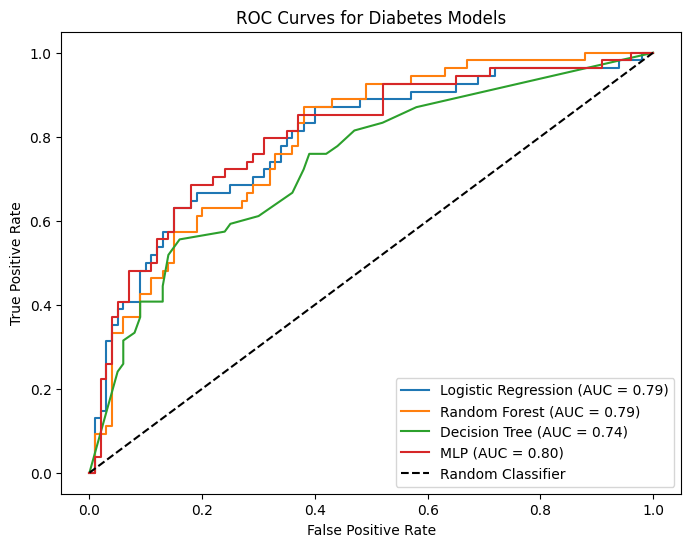

In [189]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Mengonversi label kategorikal menjadi angka
label_encoder = LabelEncoder()
Y_test_encoded = label_encoder.fit_transform(Y_test)

# Menghitung ROC untuk setiap model
fpr_logreg, tpr_logreg, _ = roc_curve(Y_test_encoded, y_pred_logreg)
fpr_rf, tpr_rf, _ = roc_curve(Y_test_encoded, y_pred_rf)
fpr_dt, tpr_dt, _ = roc_curve(Y_test_encoded, y_pred_dt)
fpr_mlp, tpr_mlp, _ = roc_curve(Y_test_encoded, y_pred_mlp)

# Menghitung AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_rf = auc(fpr_rf, tpr_rf)
auc_dt = auc(fpr_dt, tpr_dt)
auc_mlp = auc(fpr_mlp, tpr_mlp)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

# Plot random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Format the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Diabetes Models')
plt.legend()
plt.show()

In [190]:
def find_rates_for_thresholds(y_true, y_pred_prob, thresholds):
    fpr = []
    tpr = []
    for threshold in thresholds:
        y_pred = (y_pred_prob >= threshold).astype(int)
        tp = np.sum((y_pred == 1) & (y_true == 1))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))

        fpr_value = fp / (fp + tn) if (fp + tn) != 0 else 0
        tpr_value = tp / (tp + fn) if (tp + fn) != 0 else 0

        fpr.append(fpr_value)
        tpr.append(tpr_value)

    return fpr, tpr

In [191]:
thresholds = np.arange(0, 1.1, 0.1) #menggunakan treshold 0 -1

fpr_logreg, tpr_logreg = find_rates_for_thresholds(Y_test, y_pred_logreg, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(Y_test, y_pred_rf, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(Y_test, y_pred_dt, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(Y_test, y_pred_mlp, thresholds)

# Buat DataFrame

summary_df = pd.DataFrame({
    'Threshold': thresholds,
    'Logistic Regression FPR': fpr_logreg,
    'Logistic Regression TPR': tpr_logreg,
    'Random Forest FPR': fpr_rf,
    'Random Forest TPR': tpr_rf,
    'Decision Tree FPR': fpr_dt,
    'Decision Tree TPR': tpr_dt,
    'MLP FPR': fpr_mlp,
    'MLP TPR': tpr_mlp
})

print(summary_df)

    Threshold  Logistic Regression FPR  Logistic Regression TPR  \
0         0.0                     1.00                 1.000000   
1         0.1                     0.67                 0.925926   
2         0.2                     0.40                 0.870370   
3         0.3                     0.25                 0.685185   
4         0.4                     0.15                 0.592593   
5         0.5                     0.11                 0.518519   
6         0.6                     0.09                 0.407407   
7         0.7                     0.04                 0.314815   
8         0.8                     0.03                 0.203704   
9         0.9                     0.01                 0.111111   
10        1.0                     0.00                 0.000000   

    Random Forest FPR  Random Forest TPR  Decision Tree FPR  \
0                1.00           1.000000               1.00   
1                0.62           0.944444               0.52   
2     

In [192]:
import numpy as np
from sklearn.metrics import roc_curve

def find_best_threshold(Y_test, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    valid_mask = ~np.isinf(thresholds)
    fpr = fpr[valid_mask]
    tpr = tpr[valid_mask]
    thresholds = thresholds[valid_mask]

    # mencari threshold dengan TPR - FPR maksimum (Youden Index)
    optimal_idx = np.argmax(tpr - fpr)
    return thresholds[optimal_idx]

y_pred_logreg = fit_dlf_lg.predict_proba(X_test)[:, 1]
y_pred_rf = fit_dlf_rf.predict_proba(X_test)[:, 1]
y_pred_dt = fit_dlf_dt.predict_proba(X_test)[:, 1]
y_pred_mlp = fit_dlf_mlp.predict_proba(X_test)[:, 1]

best_threshold_logreg = find_best_threshold(Y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(Y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(Y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(Y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")


Best threshold for Logistic Regression: 0.39370844627704654
Best threshold for Random Forest: 0.22902536233901802
Best threshold for Decision Tree: 0.5294117647058824
Best threshold for MLP: 0.3720110293884641


In [ ]:
import pickle

# Menyimpan model terbaik dengan pickle
pklname = 'diabetes_model.sav'  # Nama file untuk menyimpan model
with open(pklname, 'wb') as file:  
    pickle.dump(fit_dlf_mlp, file)